<center><b>EE 538 Spring 2021<br>
Homework 2<br>
</b></center>


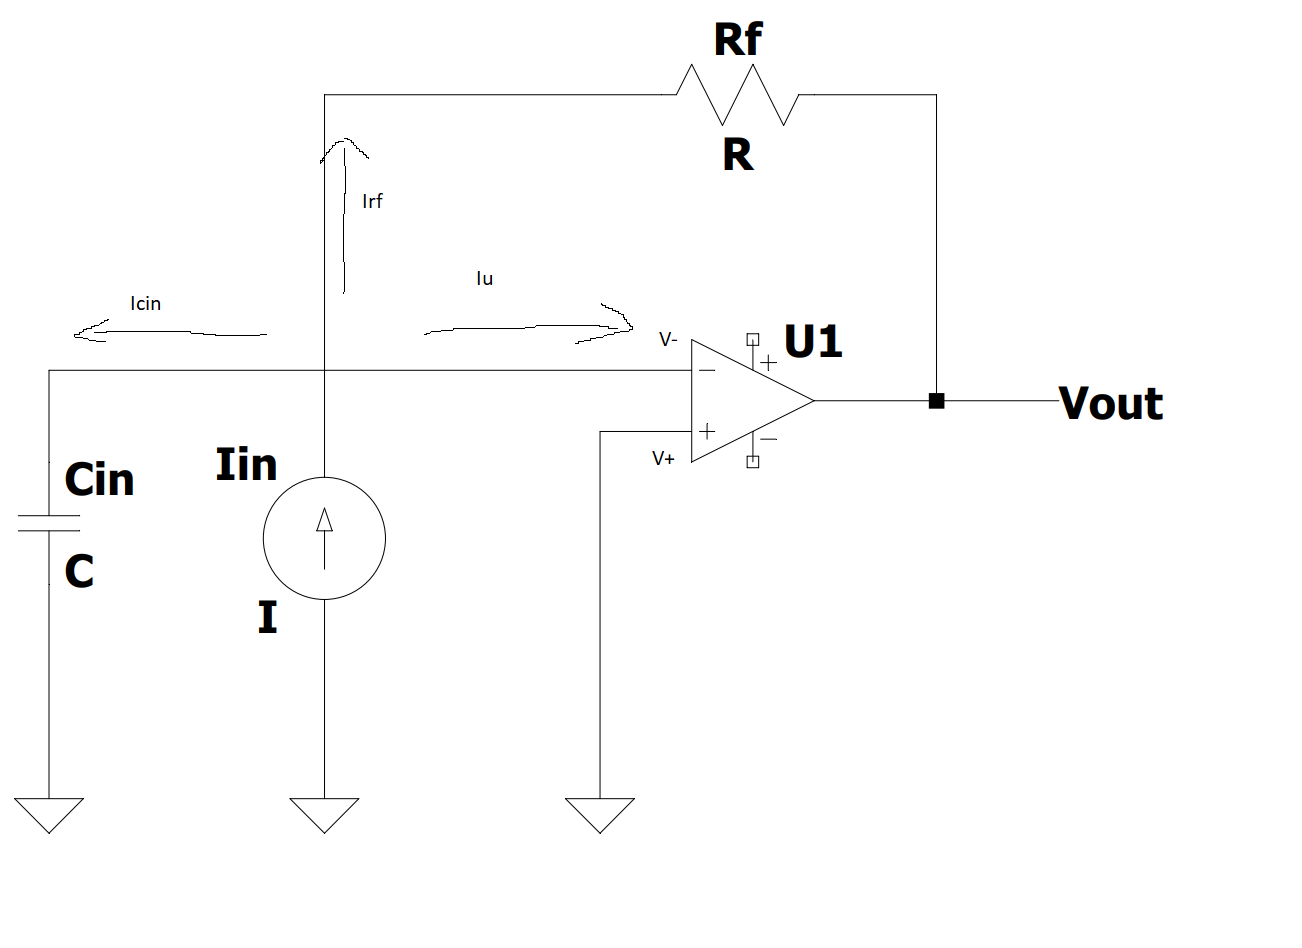

\begin{equation}
I_{u} = 0 \\
V_{+} = 0 \\
I_{in}=I_{cin}+I_{R_f}+I_{u} \\
I_{R_f} = I_{in} - I_{cin} \\
I_{cin} = \frac{V_{(-)}}{\frac{1}{sC_{in}}} = V_{(-)}sC_{in}\\
V_{out} = V_{(-)} - I_{R_f}R_{f} \\
V_{out} = A_{ol}(f) (V_{(+)} - V_{(-)}) \\
V_{(-)} = - \frac{V_{out}}{A_{ol}(f)}
\end{equation}

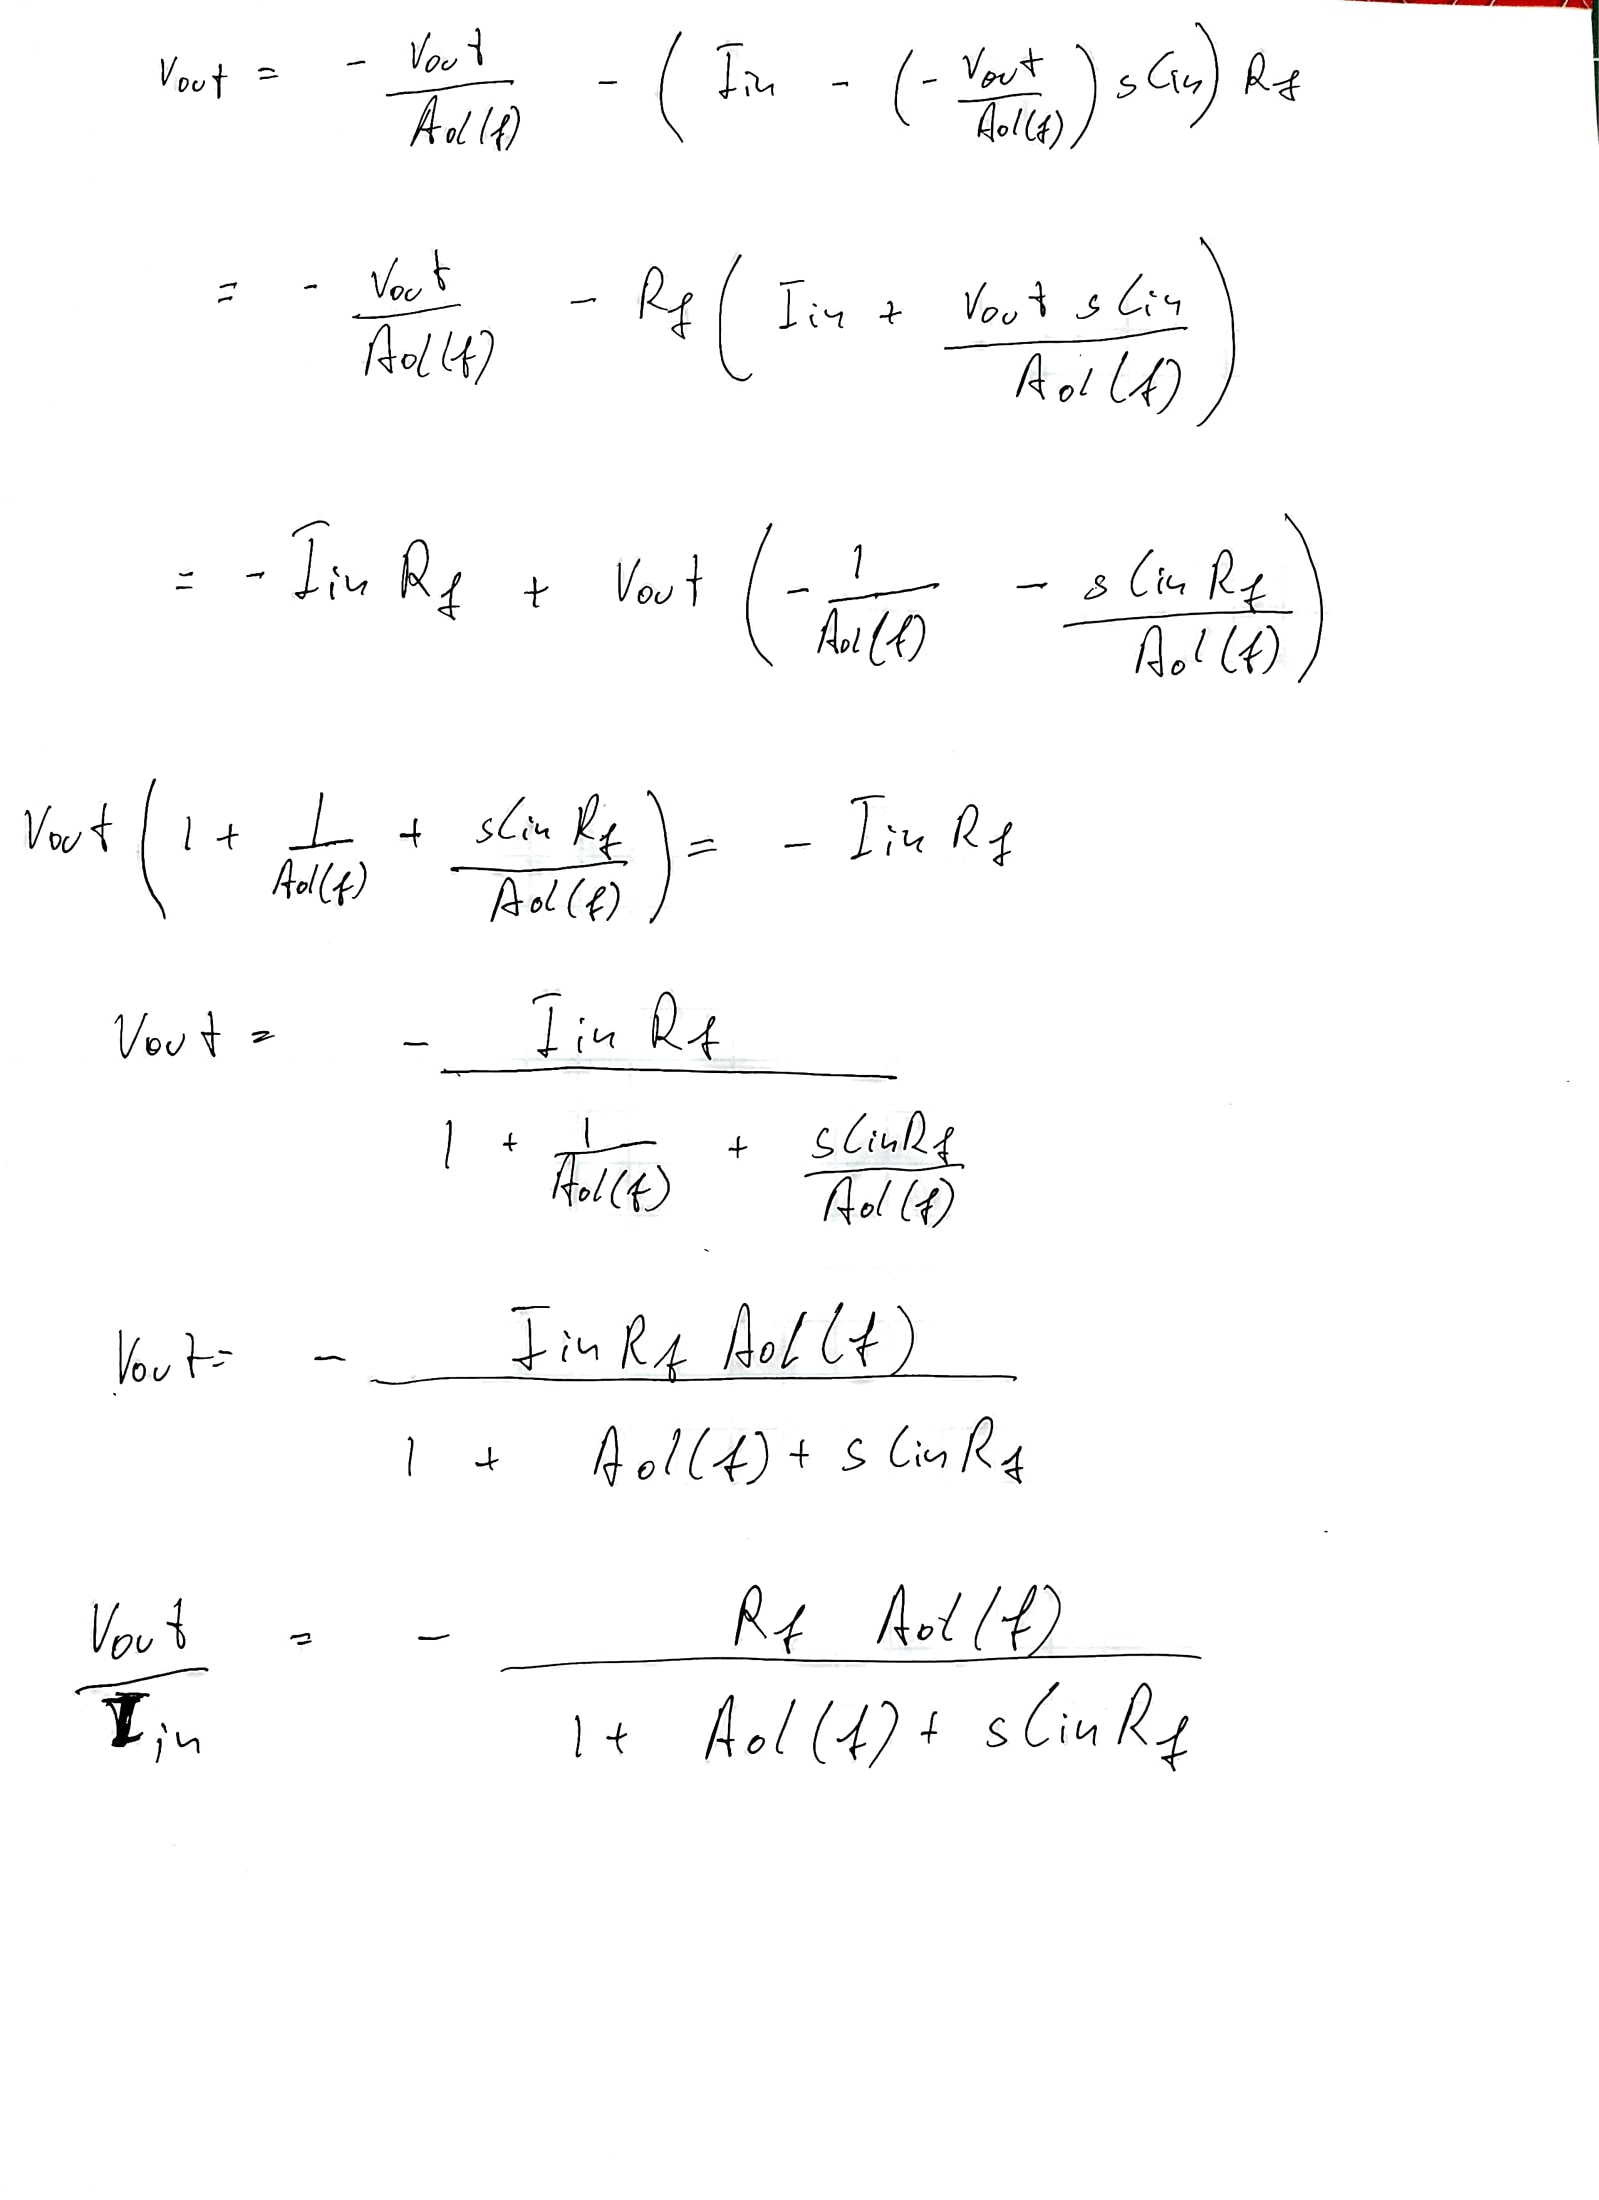

- $s_p$ pole of open-loop transfer function
- $\omega_p = |s_p|$
- $\omega_u$ GBW of the opamp. $\omega_u=A_0 \times \omega_p$
- $A_0$ open-loop DC gain of the opamp

References:
- [Transimpedance Amplifier Noise Considerations](https://www.analog.com/en/technical-articles/transimpedance-amplifier-noise-considerations.html)
- [Automating circuit designs for
photodiode amplifiers](https://www.ti.com/lit/an/slyt703/slyt703.pdf?ts=1618709951267)
- [Resonant Frequency of a Dynamic System](https://www.youtube.com/watch?v=0ZUp07xP--A)
- [Trans-Impedance Amplifier – Transfer Function](https://2n3904blog.com/trans-impedance-amplifier-transfer-function/)

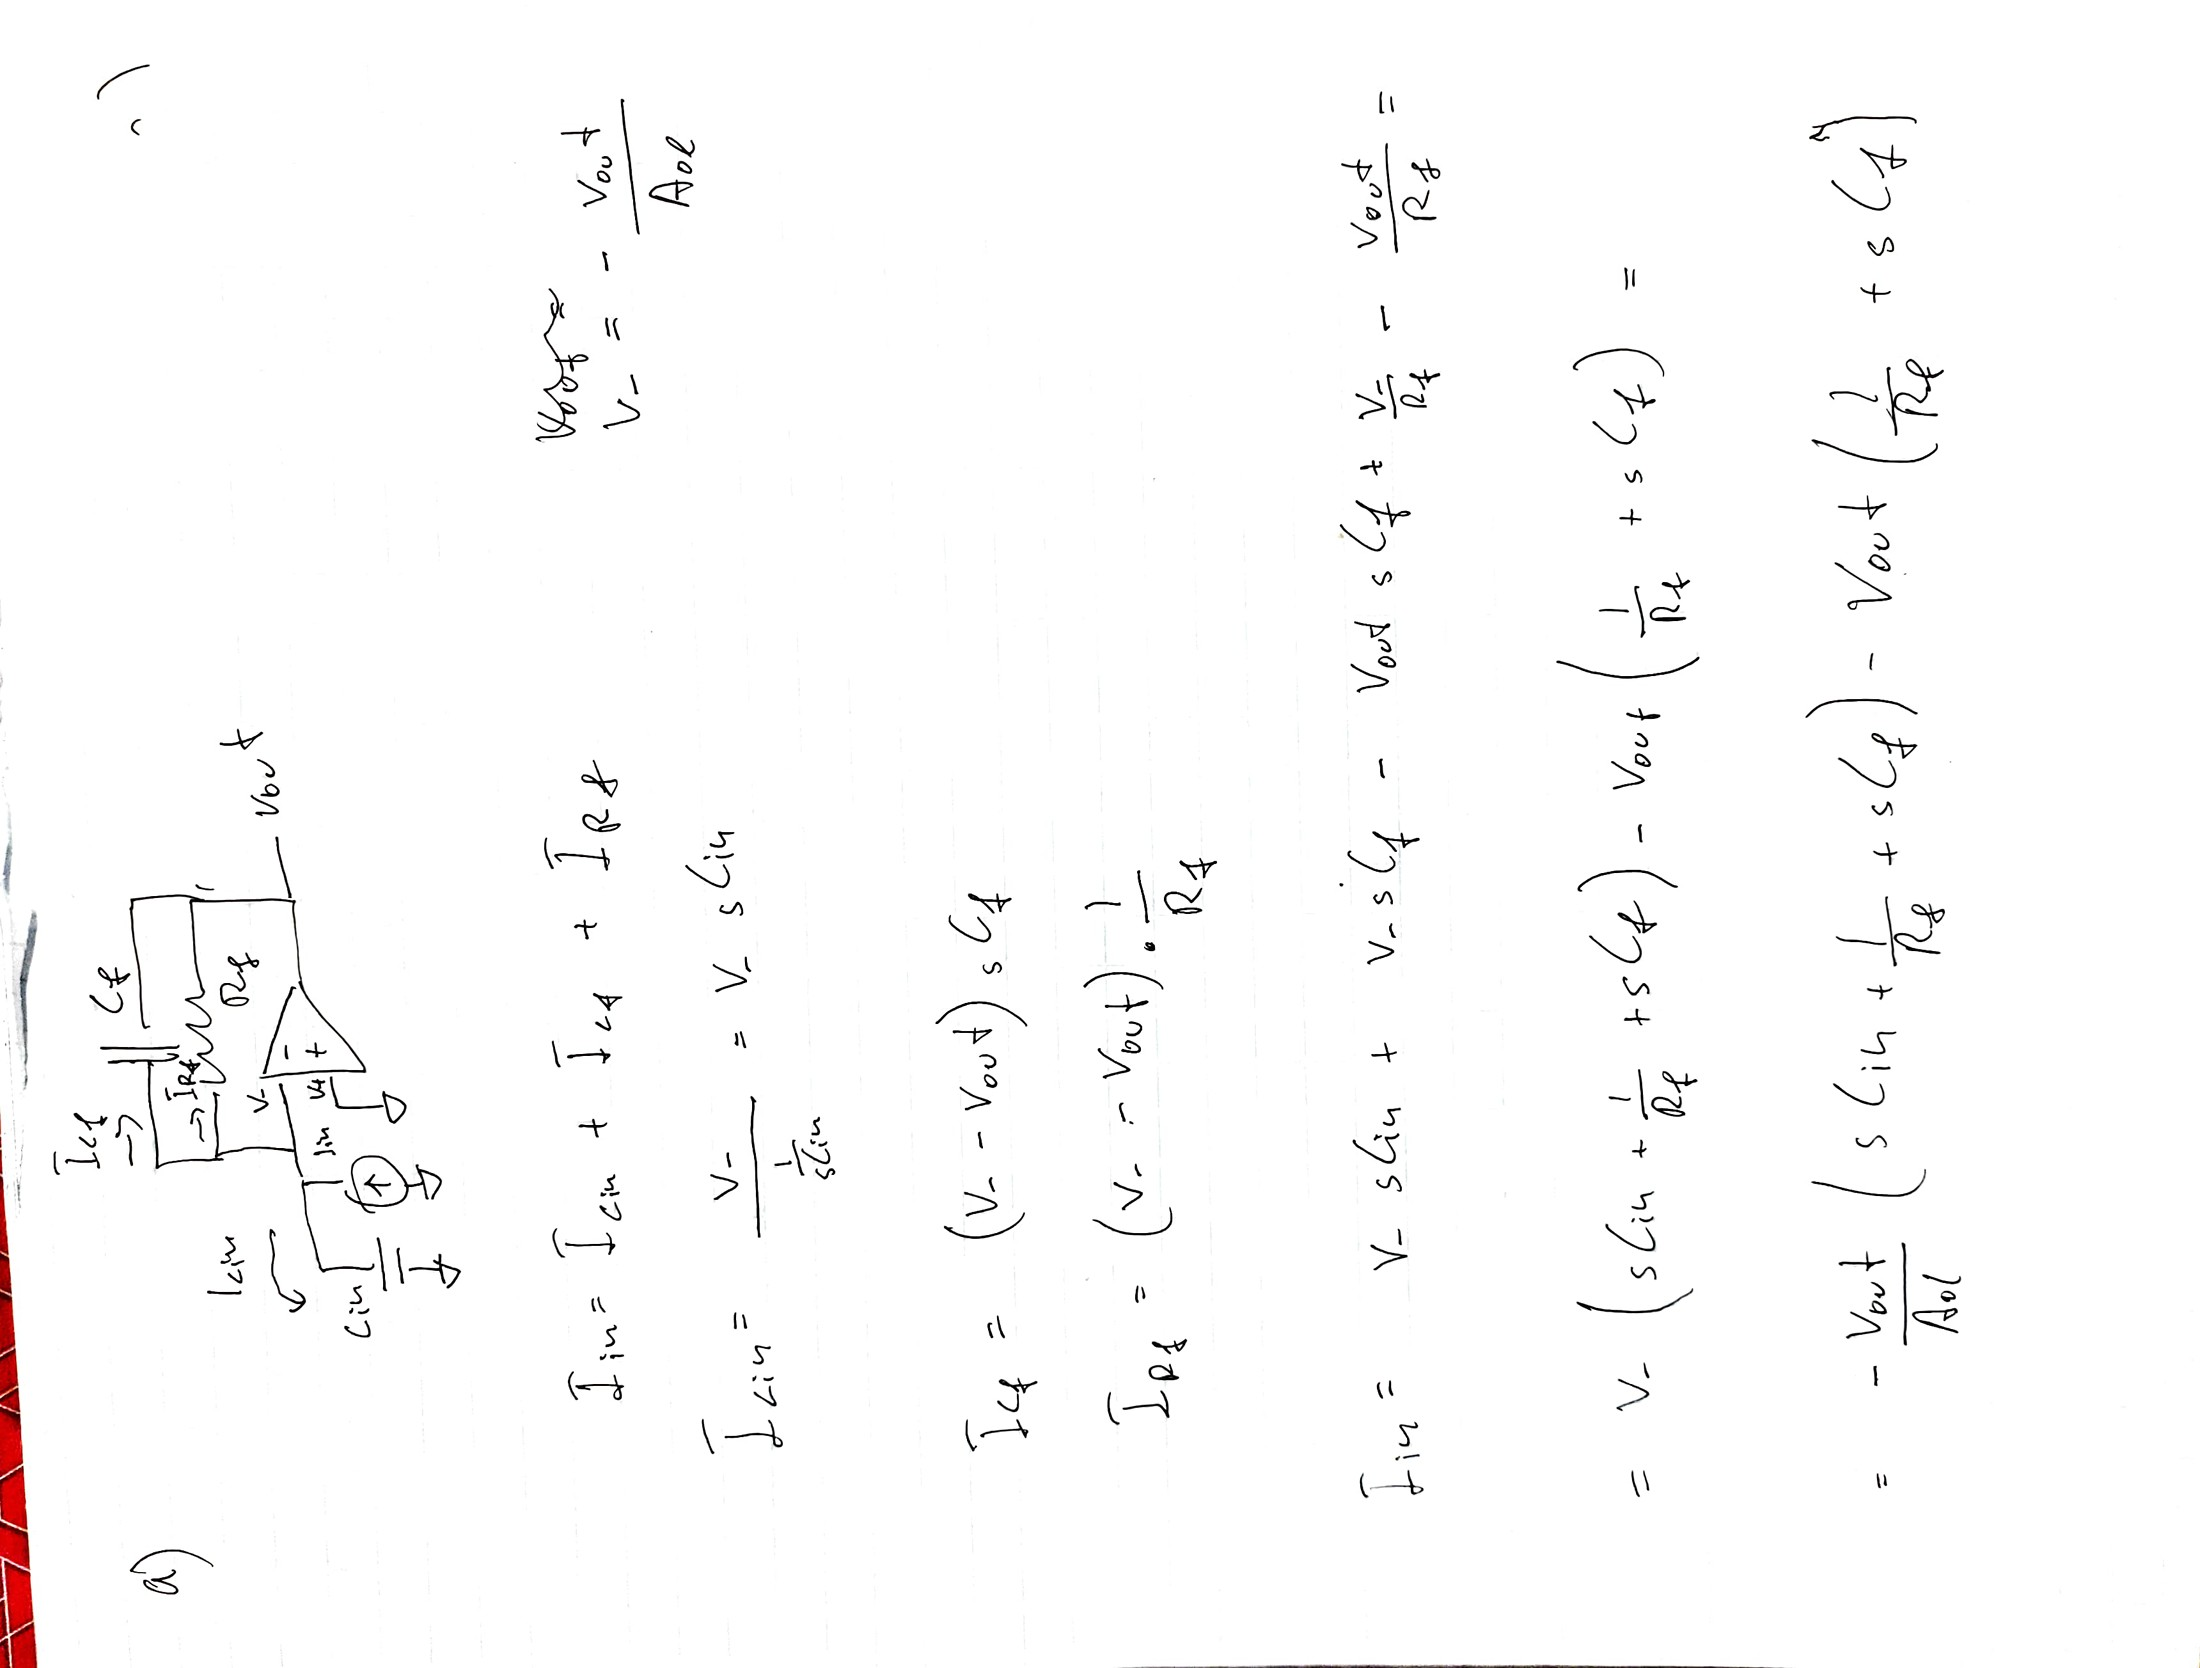


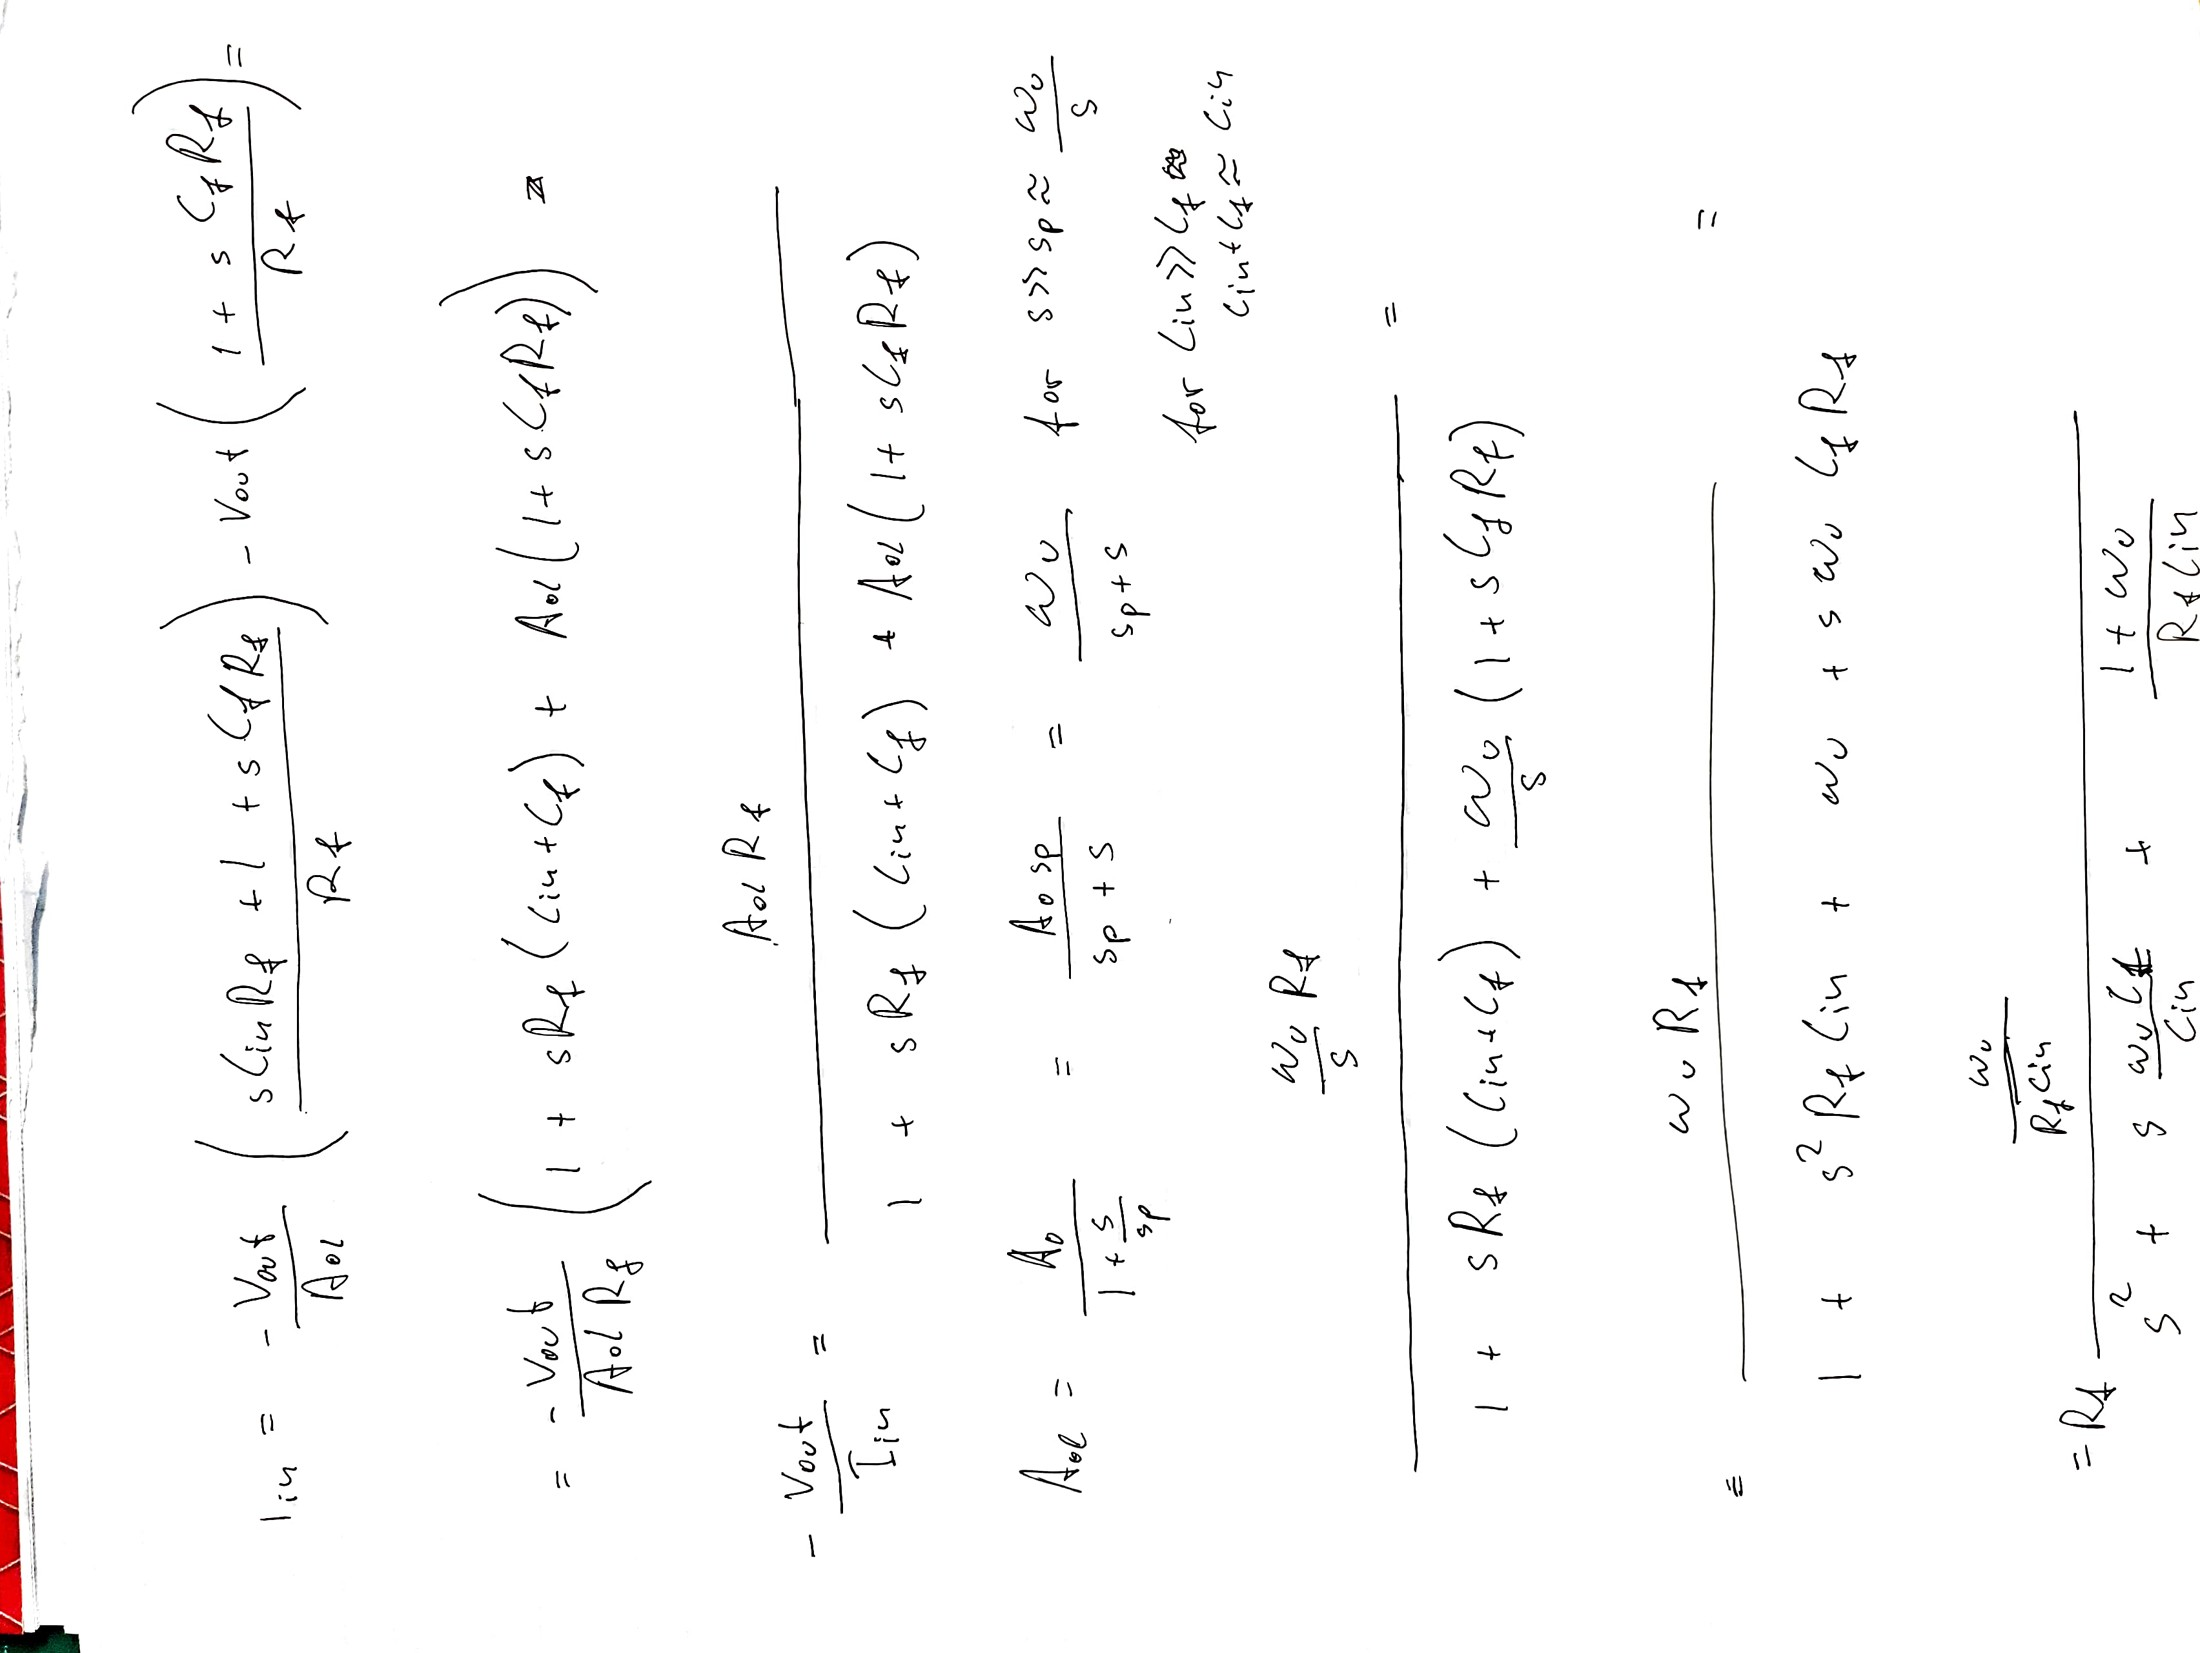

I just noticed that below I should have written $s 2 \zeta \omega_0$ which ends up being $s \sqrt{2} \omega_0$

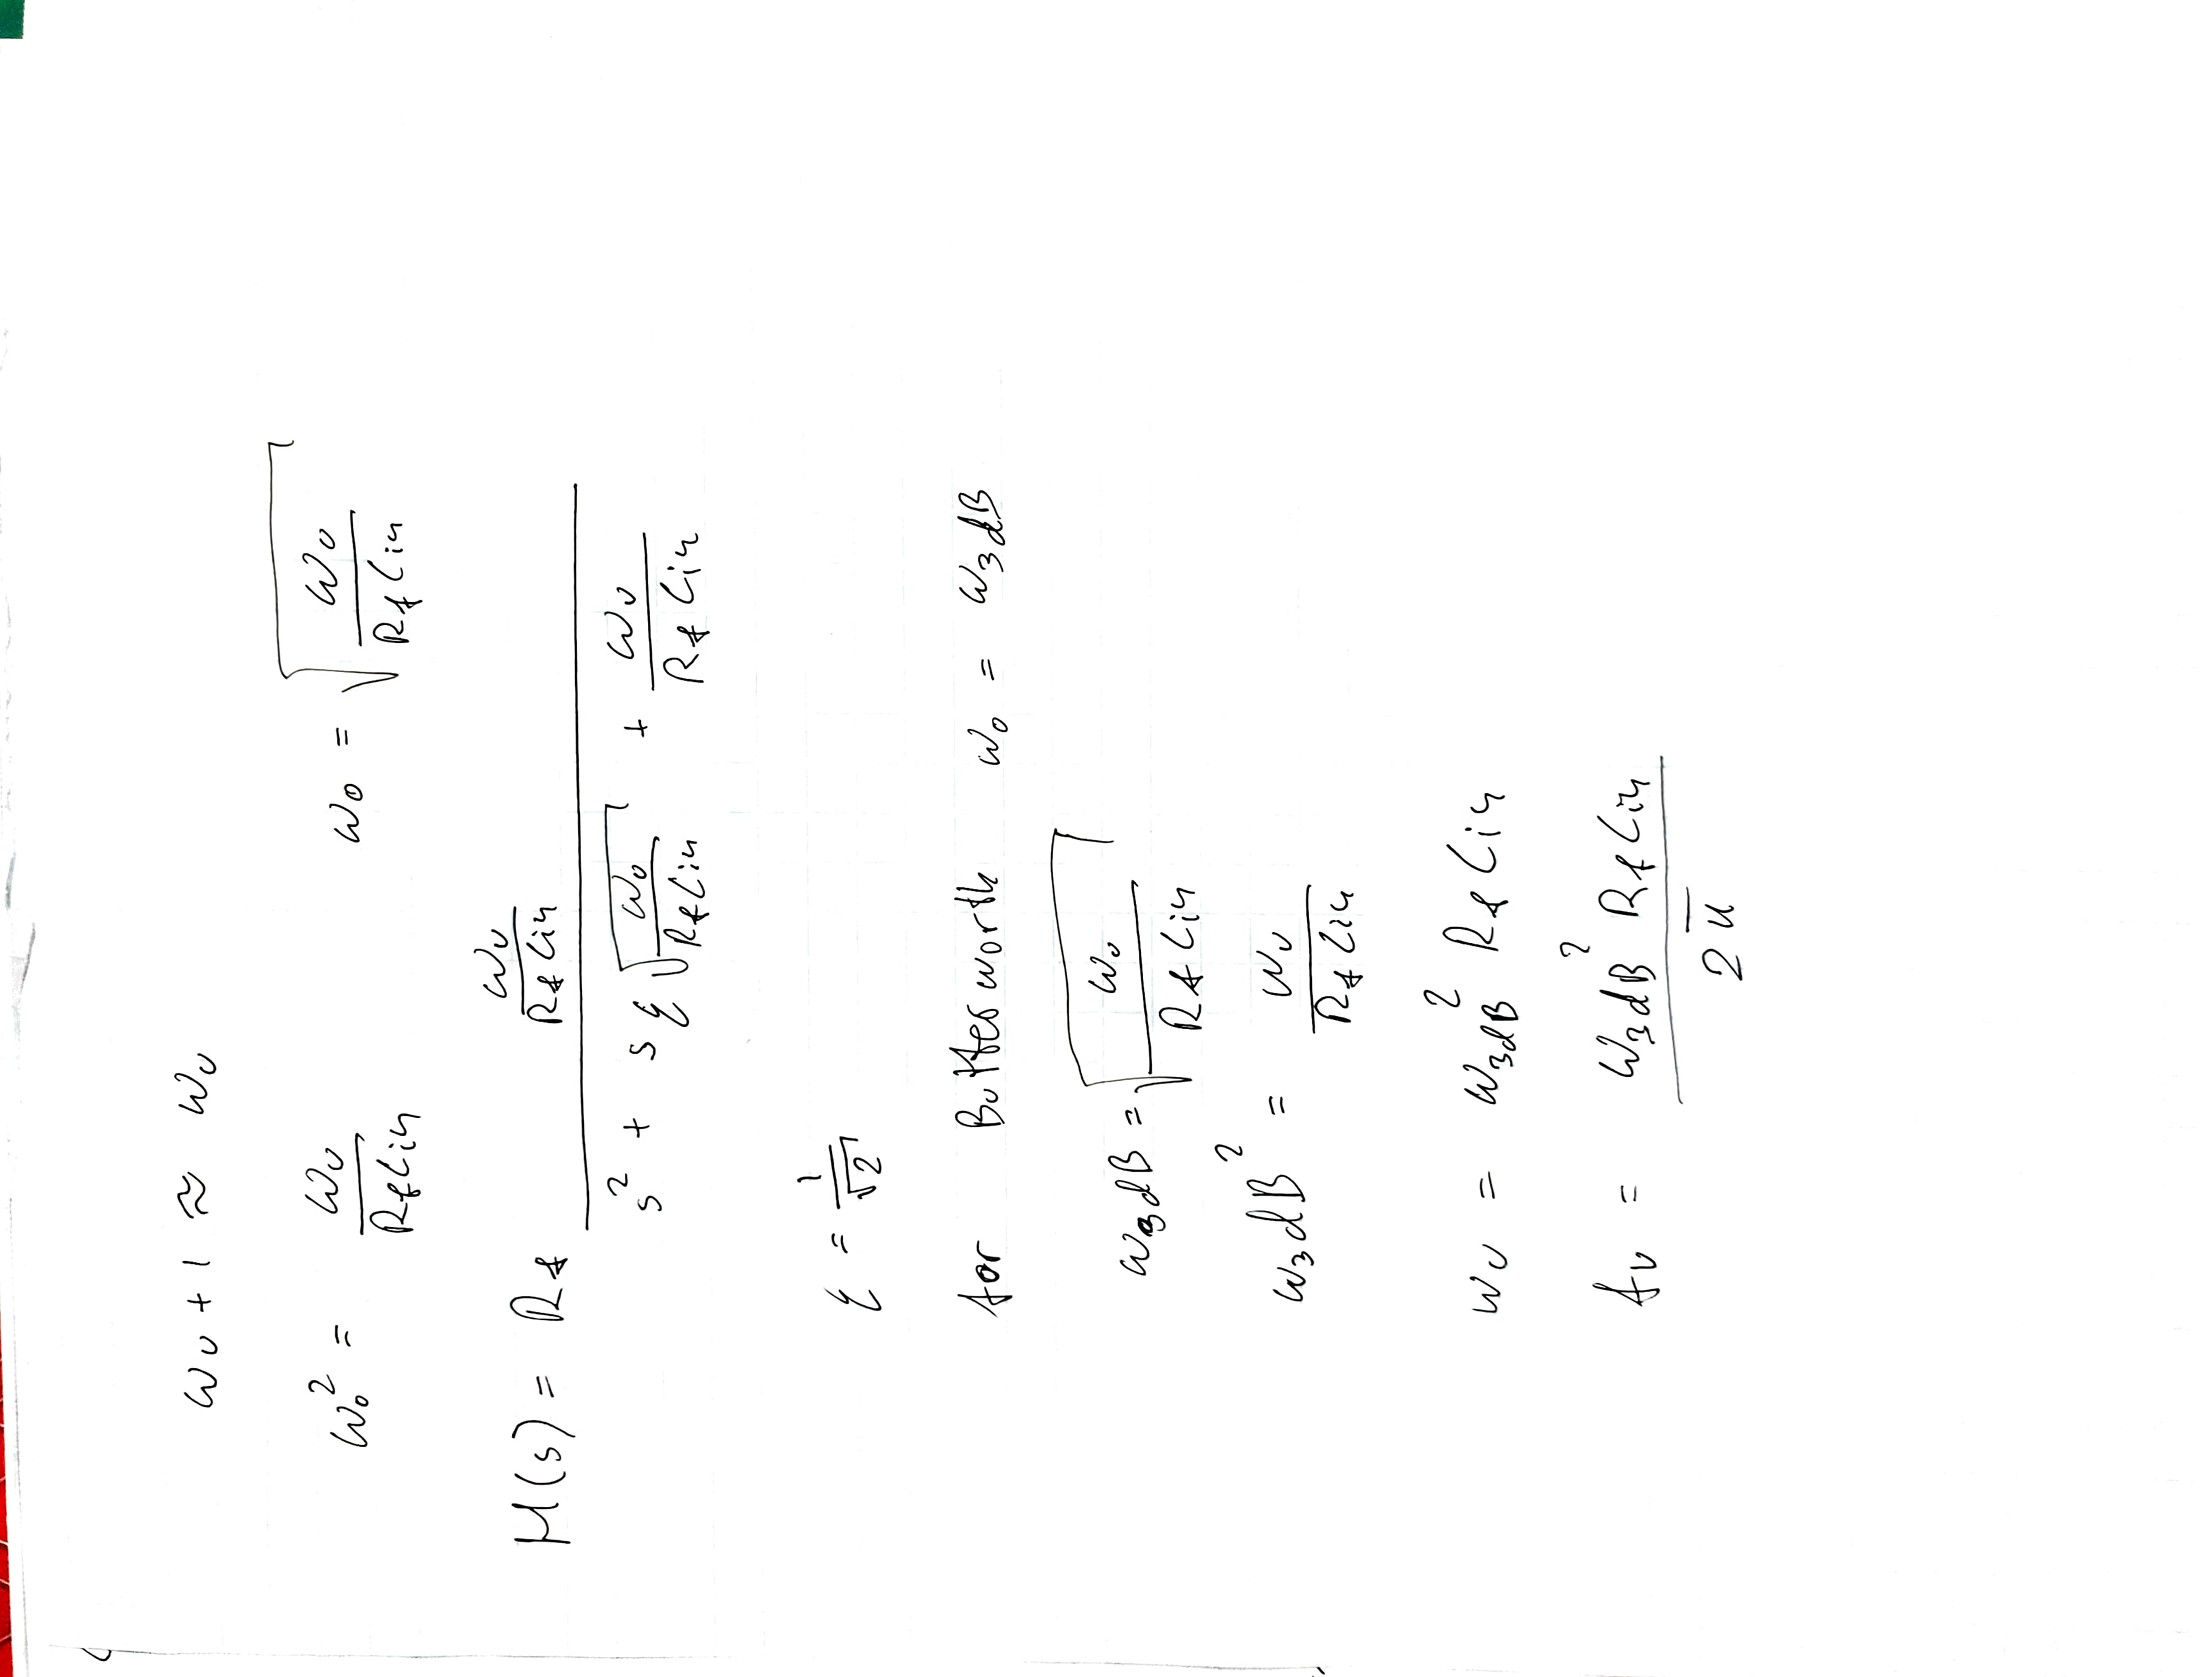

1 b)


\begin{equation}
H(s)=\frac{\omega_0^2}{s^2+s 2 \zeta \omega_0 + \omega_0^2}
\end{equation}

\begin{equation}
\omega_0 = \sqrt{\frac{\omega_u}{R_fC_{in}}}
\end{equation}

\begin{equation}
\zeta = \frac{1}{\sqrt{2}}
\end{equation}

\begin{equation}
\frac{1}{R_fC_f}=\sqrt{\frac{\omega_u}{2R_fC_{in}}}
\end{equation}

\begin{equation}
\omega_0 = \frac{\sqrt{2}}{R_fC_f}=\sqrt{\frac{\omega_u}{R_fC_{in}}}
\end{equation}

\begin{equation}
\sqrt{\frac{\omega_u}{R_fC_{in}}} = \sqrt{2}\sqrt{\frac{\omega_u}{2R_fC_{in}}}=\frac{\sqrt{2}}{R_fC_f}
\end{equation}

from 1a):
\begin{equation}
H(s)=R_f\frac{\omega_0^2}{s^2 + s 2 \frac{1}{\sqrt{2}} \sqrt{\frac{\omega_u}{R_fC_{in}}} + \omega_0^2}
\end{equation}

substitute for $\omega_0$, we get a transfer function in Butterworth form:

\begin{equation}
H(s)=R_f\frac{\left(\sqrt{2}\frac{1}{R_fC_f}\right)^2}{s^2 + s \sqrt{2}\left(\sqrt{2} \frac{1}{R_fC_f}\right) + \left(\sqrt{2}\frac{1}{R_fC_f}\right)^2}
\end{equation}

further, from 1a):

\begin{equation}
R_f\frac{\frac{\omega_u}{R_fC_{in}}}{s^2 + s \omega_u\frac{C_fR_f}{R_fC_{in}} + \frac{\omega_u}{R_fC_{in}}}
\end{equation}

\begin{equation}
R_f\frac{\frac{\omega_u}{R_fC_{in}}}{s^2 + s \left( \omega_u\frac{C_f}{C_{in}}\right) + \frac{\omega_u}{R_fC_{in}}}
\end{equation}

\begin{equation}
\frac{\omega_uC_f}{C_{in}} = 2 \zeta \frac{\omega_u}{R_fC_{in}}
\end{equation}

\begin{equation}
R_fC_f = 2 \frac{1}{\sqrt{2}}
\end{equation}

\begin{equation}
R_fC_f = \sqrt{2}
\end{equation}

\begin{equation}
\frac{1}{R_fC_f}=\frac{1}{\sqrt{2}}
\end{equation}

interesting result, $\frac{1}{R_fC_f} = \zeta$

1c)
Note typo: I forgot a "2" when moving the $\sqrt{x}$ term from the RHS to the denominator on the LHS but this "2" is added back correctly when plugging numbers.

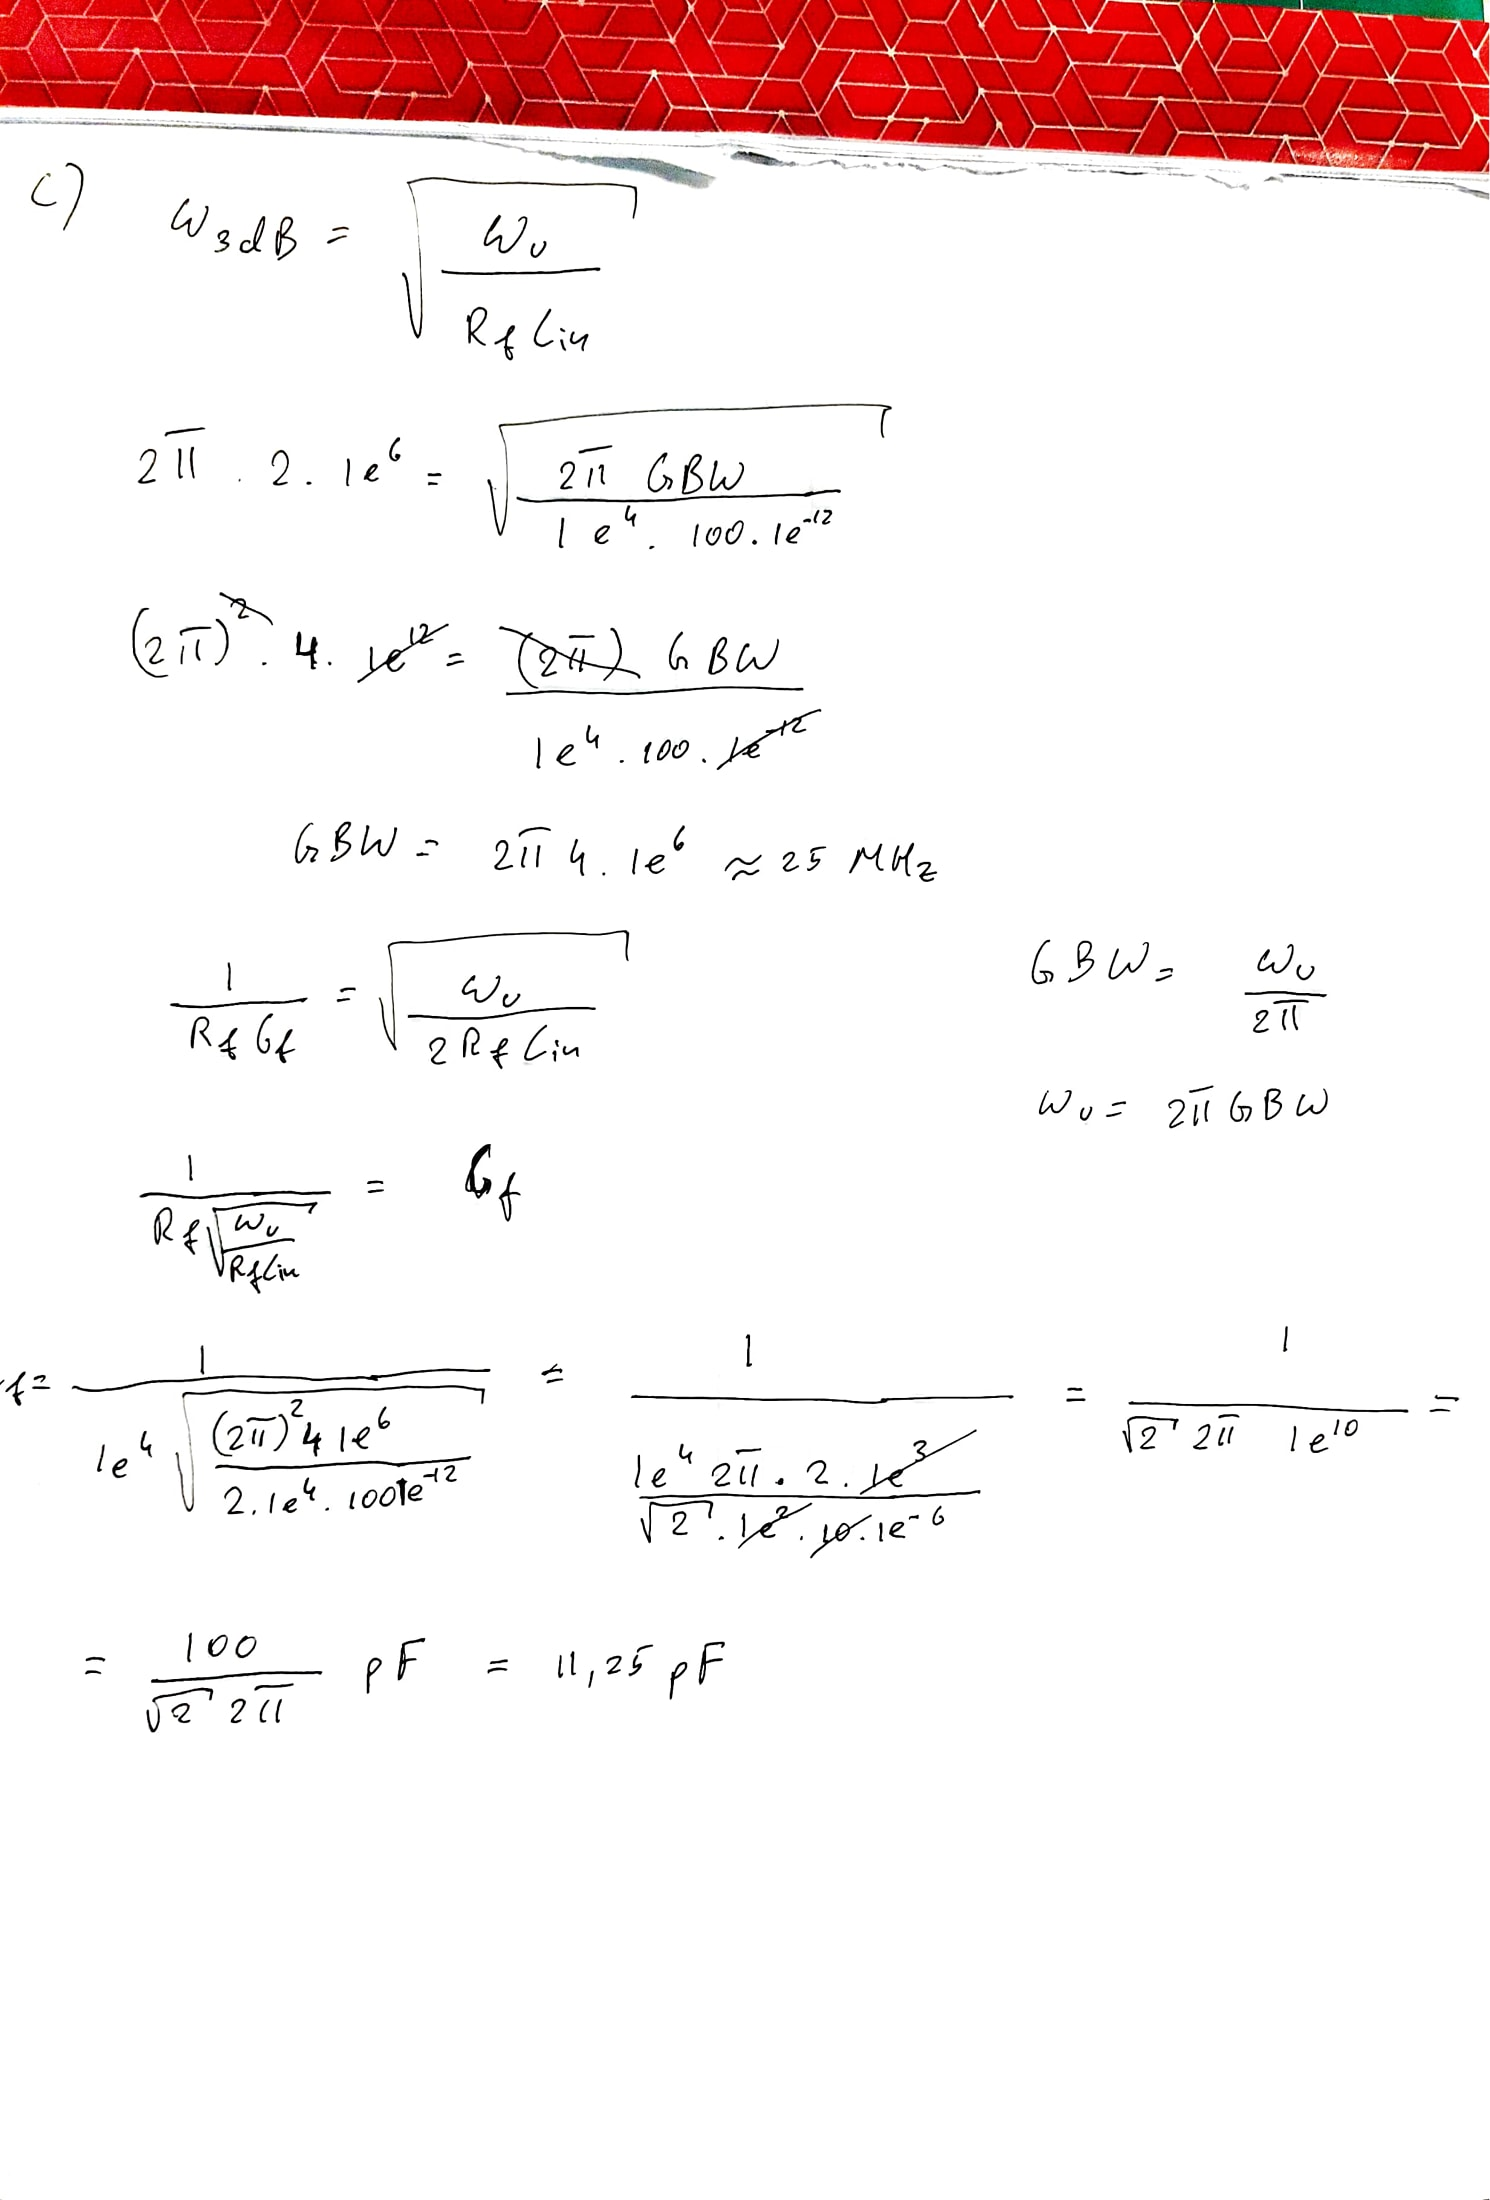



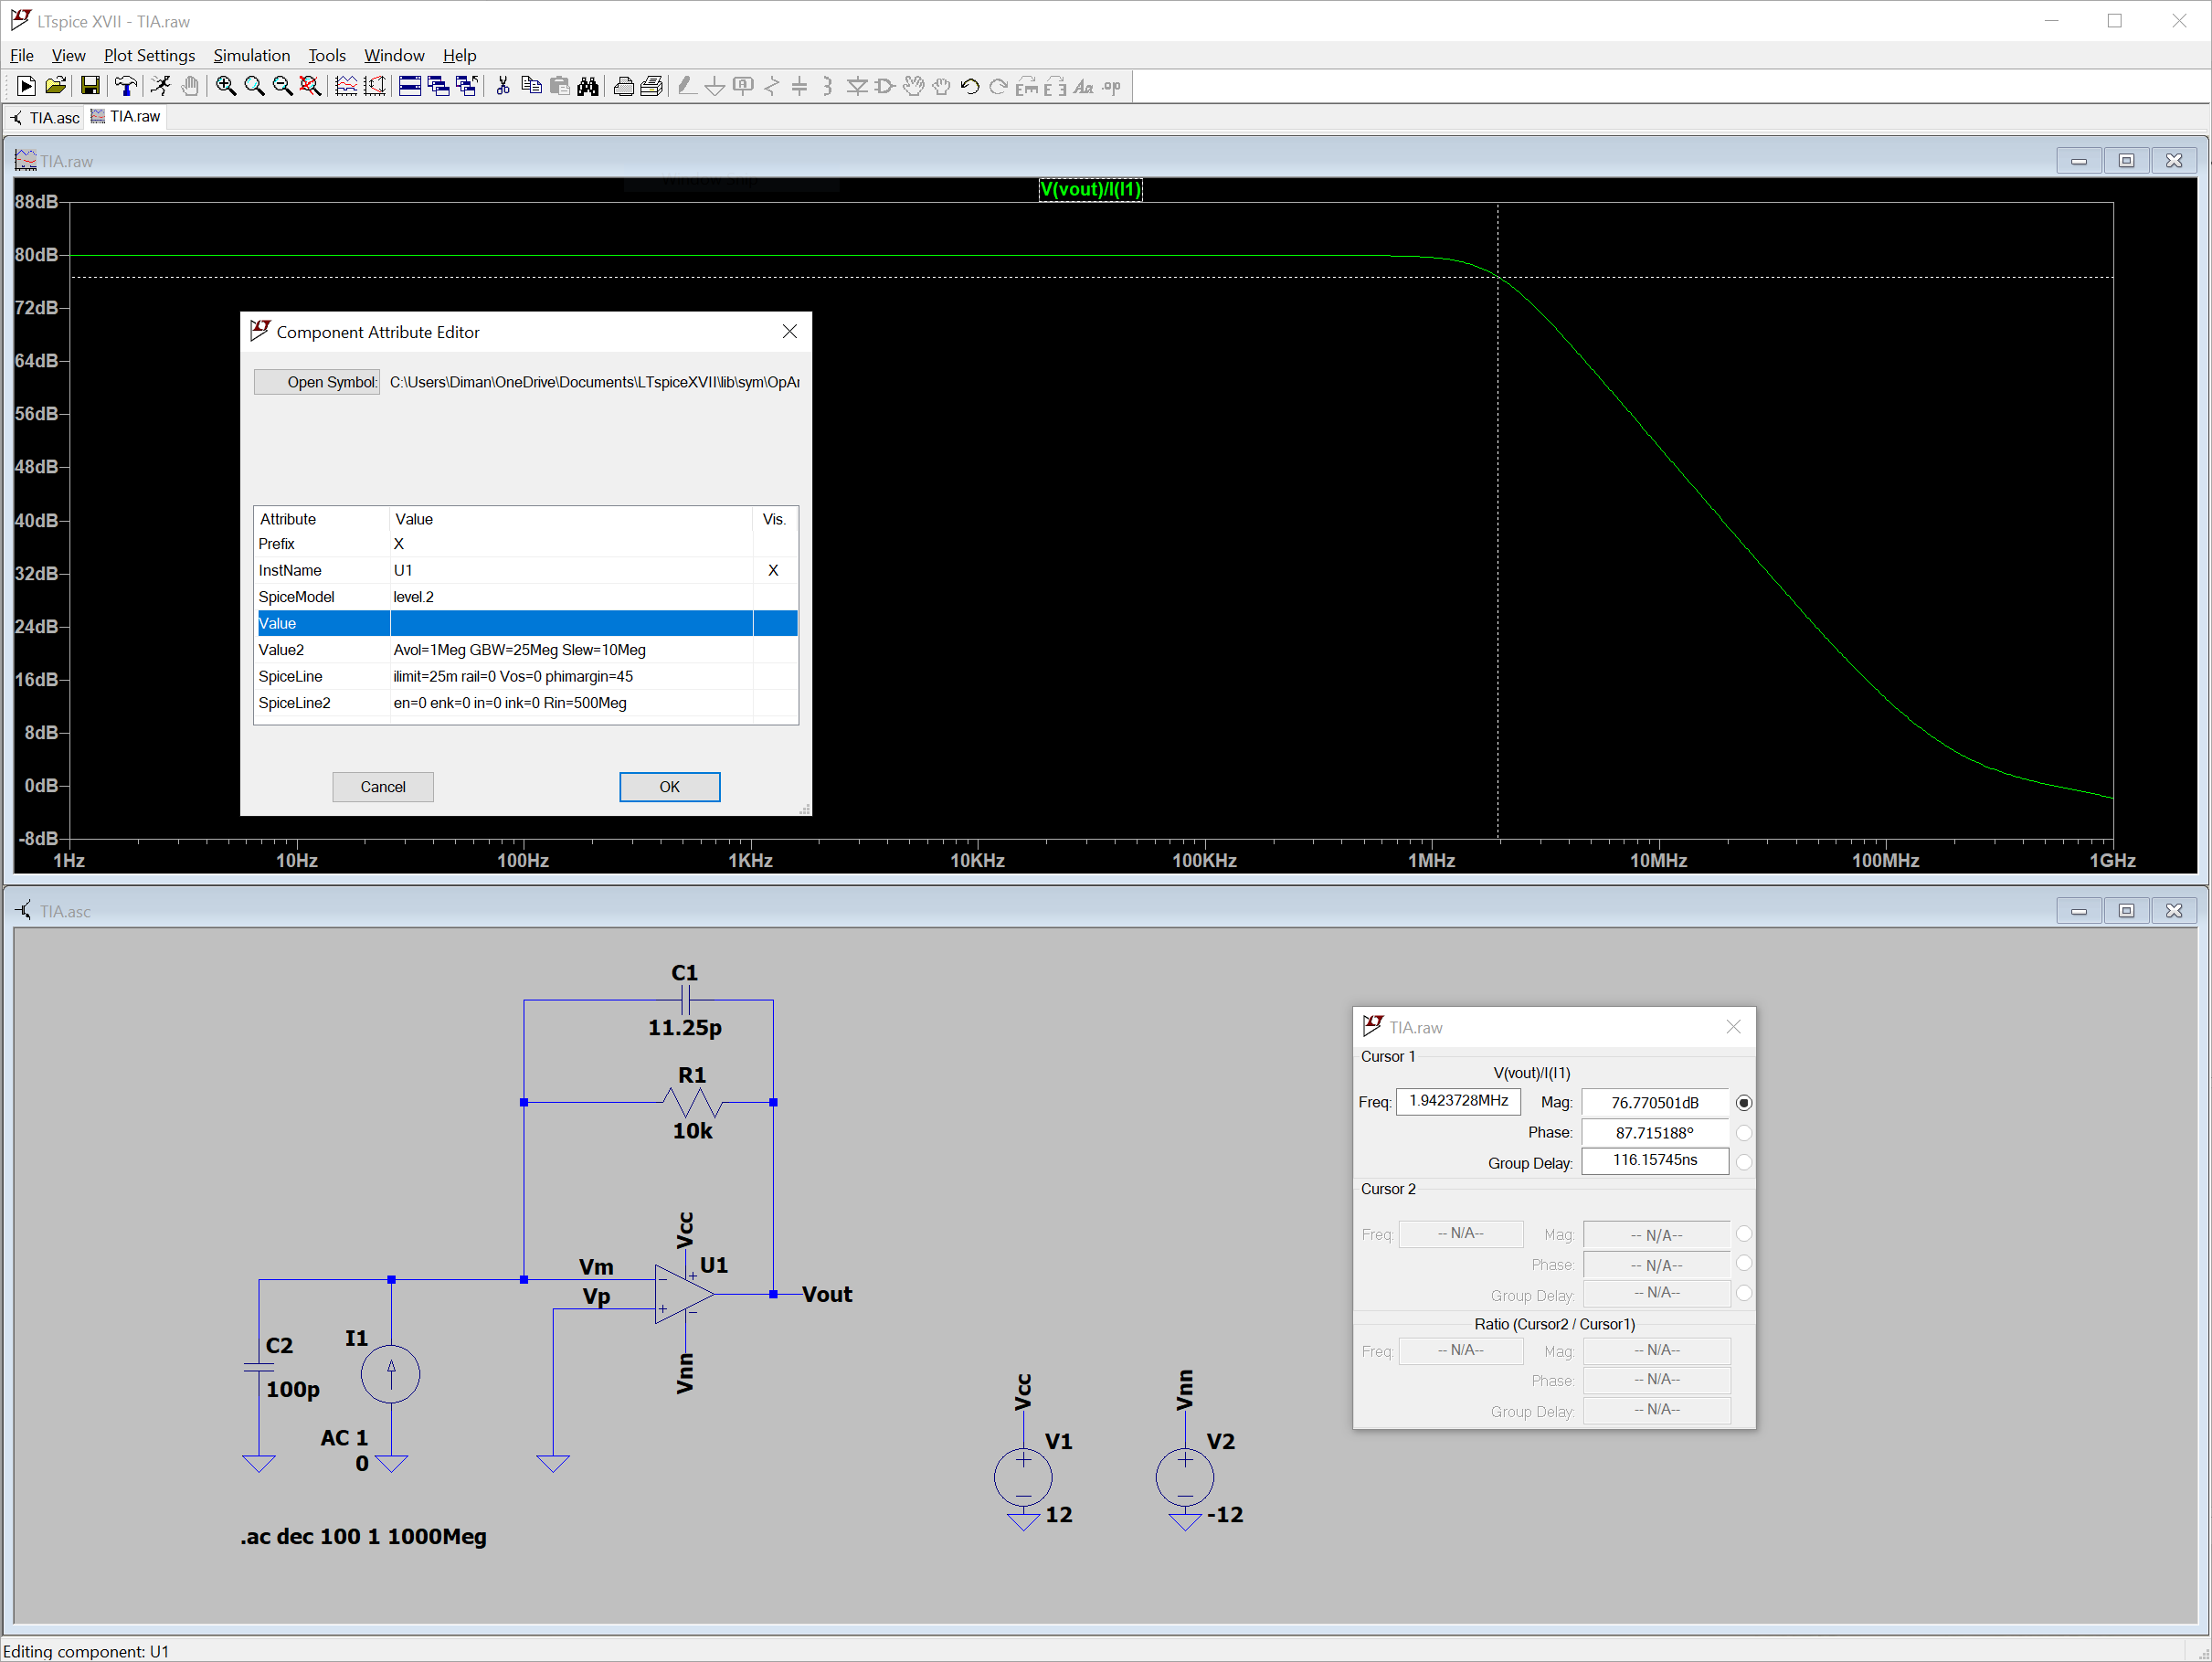

1d)


In [6]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogx(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

k = 1.38e-23                 # Boltzmann constant, J/K
T = 300                      # room temperature (27C) in Kelvin

e_na = 5e-9 # 5nv / rtHz

c_in = 100e-12
  = 11.25e-12
r_f = 10e3
f_t = 25e6 # 25MHz

en_rf2 = 4 * k * T * r_f
en_rf = np.sqrt(en_rf2)

f = np.linspace(1, 10**9,10**6)
s = np.multiply(2*np.pi, f)


From office hours, lecture: $i_{ena} = e_{na} sC_{in}$

(1953002.951048951, 4.525528087968495e-12)

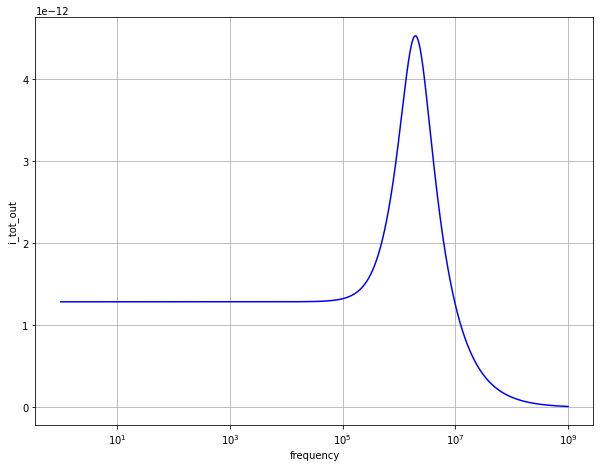

In [7]:
zeta = 1 / np.sqrt(2)
omega_u = 2 * np.pi * f_t
omega_0_2 = omega_u / (r_f*c_in)
omega_0 = np.sqrt(omega_0_2)

tf_tia_mag = r_f * omega_0_2 / np.sqrt( (s*np.sqrt(2)*omega_0)**2 + (omega_0_2-s**2)**2)

i_na = e_na * s * c_in

# input is current, output is voltage
e_na_out = i_na * tf_tia_mag
e_en_rf_out = (en_rf/r_f) * tf_tia_mag

e_tot_out = np.sqrt(e_na_out**2 + e_en_rf_out**2) 
i_tot_out = e_tot_out / r_f

plot_xlogy(f, i_tot_out, "frequency", "i_tot_out")

x = np.argmax(i_tot_out)
f[x],i_tot_out[x]

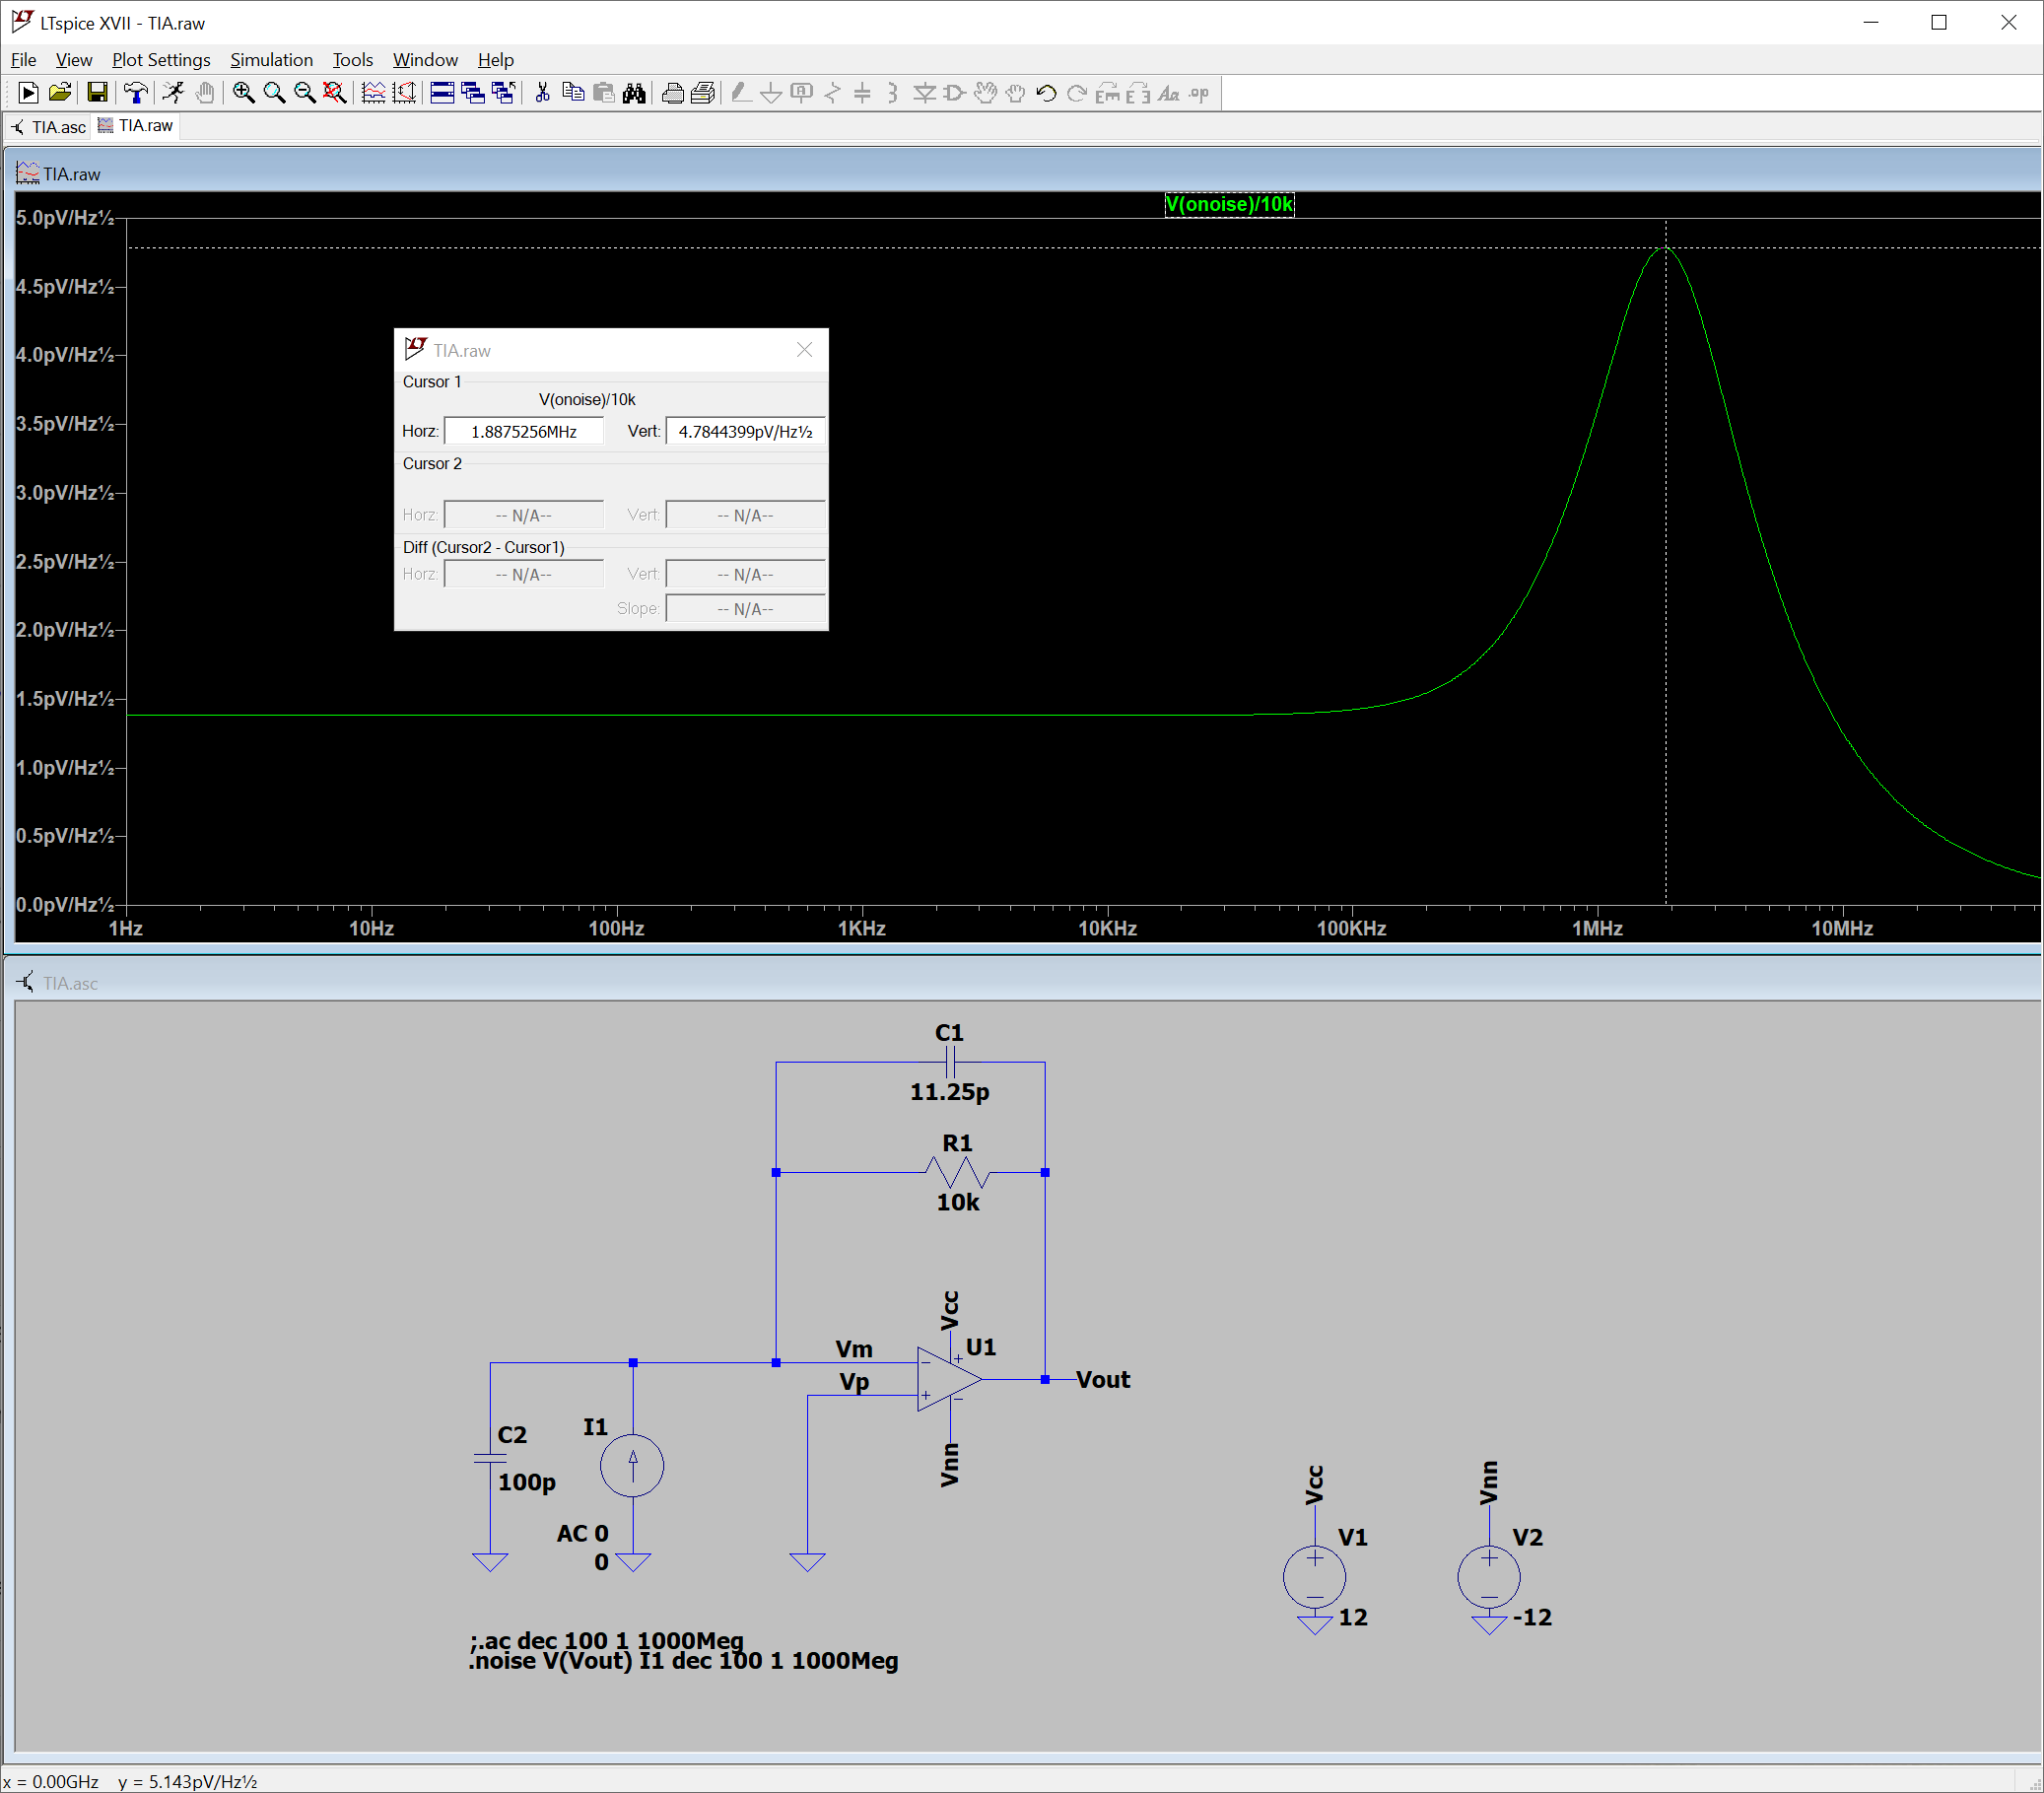

e) shot noise:
\begin{equation}
i_{ns}=\sqrt{2q I_s}
\end{equation}

In [8]:
q = 1.602e-19
I_s = 10e-6 # sensor current
i_ns = np.sqrt(2 * q * I_s)
i_ns

1.7899720668211559e-12

Noise factor is noise due to amplifier, noise due to input, both subject to amplification, divided by noise due to input.
\begin{equation}
F = \frac{e_{ns}^2 + e_{na}^2 + e_{nrf}^2}{e_{ns}^2}
\end{equation}

Noise figure is noise factor in dB.

In [9]:
s = 2 * np.pi * 1000 # 1kHz
tf_tia_mag = r_f * omega_0_2 / np.sqrt( (s*np.sqrt(2)*omega_0)**2 + (omega_0_2-s**2)**2)

i_na = e_na * s * c_in

# input is current, output is voltage
e_na_out = i_na * tf_tia_mag
e_en_rf_out = (en_rf/r_f) * tf_tia_mag
e_ns_out = i_ns * tf_tia_mag

F = (e_na_out**2 + e_en_rf_out ** 2 + e_ns_out ** 2) / e_ns_out**2
NF = 10 * np.log10(F)
NF

1.8094464380696111

$NF = 1.8dB$